#Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification
from sklearn.datasets import make_circles
from sklearn import preprocessing
from sklearn import svm
%matplotlib inline

#Load Dataset

In [2]:
from google.colab import drive
drive.mount("/content/gdrive/")

Mounted at /content/gdrive/


In [4]:
bank_data_dir = '/content/gdrive/MyDrive/SWE 4-2/AI/AIML/'

In [5]:
df= pd.read_csv(bank_data_dir+"bank-full.csv",sep=';')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [6]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [7]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [13]:
print("row:   ",df.shape[0])
print("col:   ",df.shape[1])
print("missing:   \n",df.isnull().sum())

row:    45211
col:    17
missing:   
 age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


In [18]:
print ("features: \n" ,df.columns.tolist())

features: 
 ['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'y']


In [20]:
print ("unique values :  \n",df.nunique())

unique values :  
 age            77
job            12
marital         3
education       4
default         2
balance      7168
housing         2
loan            2
contact         3
day            31
month          12
duration     1573
campaign       48
pdays         559
previous       41
poutcome        4
y               2
dtype: int64


<AxesSubplot:>

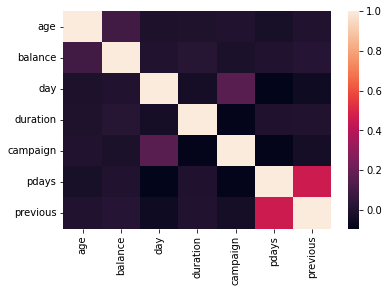

In [21]:
sns.heatmap(df.corr())

In [23]:
df_copy = df.copy()

# Data Mapping

In [28]:
def unique_values(list1):

    unique_list = []

    for x in list1:
        if x not in unique_list:
            unique_list.append(x)

    # print values
    for x in unique_list:
        print(x)

In [29]:
unique_values(df['marital'])

married
single
divorced


In [30]:
unique_values(df['education'])

tertiary
secondary
unknown
primary


In [31]:
unique_values(df['contact'])

unknown
cellular
telephone


In [32]:
unique_values(df['poutcome'])

unknown
failure
other
success


In [33]:
unique_values(df['job'])

management
technician
entrepreneur
blue-collar
unknown
retired
admin.
services
self-employed
unemployed
housemaid
student


In [34]:
unique_values(df['month'])

may
jun
jul
aug
oct
nov
dec
jan
feb
mar
apr
sep


In [24]:
df_copy['marital'] = df_copy['marital'].map({'single':1, 'married':2,'divorced':3})
df_copy['education'] = df_copy['education'].map({'primary':1,'secondary':2,'tertiary':3,'unknown':4})
df_copy['default'] = df_copy['default'].map({'yes':1,'no':2})
df_copy['housing'] = df_copy['housing'].map({'yes':1,'no':2})
df_copy['loan'] = df_copy['loan'].map({'yes':1,'no':2})
df_copy['contact'] = df_copy['contact'].map({'telephone':1,'cellular':2,'unknown':3})
df_copy['poutcome'] = df_copy['poutcome'].map({'success':1,'failure':2,'other':3,'unknown':4})
df_copy['job'] = df_copy['job'] .map({'management':1,'entrepreneur':2,'technician':3,'blue-collar':4,'unknown':5,'retired':6,'admin.':7,'services':8
                                      ,'self-employed':9,'unemployed':10,'housemaid':11,'student':12})
df_copy['month']=df['month'].map({'jan':1,'feb':2,'mar':3,'apr':4,'may':5,'jun':6,'jul':7,'aug':8,'sep':9,'oct':10,'nov':11,'dec':12})
df_copy['y'] = df_copy['y'].map({'yes':1,'no':2})

In [35]:
print(df_copy,5)

       age  job  marital  education  default  balance  housing  loan  contact  \
0       58    1        2          3        2     2143        1     2        3   
1       44    3        1          2        2       29        1     2        3   
2       33    2        2          2        2        2        1     1        3   
3       47    4        2          4        2     1506        1     2        3   
4       33    5        1          4        2        1        2     2        3   
...    ...  ...      ...        ...      ...      ...      ...   ...      ...   
45206   51    3        2          3        2      825        2     2        2   
45207   71    6        3          1        2     1729        2     2        2   
45208   72    6        2          2        2     5715        2     2        2   
45209   57    4        2          2        2      668        2     2        1   
45210   37    2        2          2        2     2971        2     2        2   

       day  month  duration

# Preprocessing

In [38]:
scl = preprocessing.StandardScaler()
fields = df_copy.columns.values[:-1]
df_x = pd.DataFrame(scl.fit_transform(df_copy[fields]), columns = fields)

In [39]:
print(df_x,5)

            age       job   marital  education  default   balance   housing  \
0      1.606965 -1.218153  0.275762   1.036362  0.13549  0.256419 -0.893915   
1      0.288529 -0.552728 -1.368372  -0.300556  0.13549 -0.437895 -0.893915   
2     -0.747384 -0.885440  0.275762  -0.300556  0.13549 -0.446762 -0.893915   
3      0.571051 -0.220015  0.275762   2.373280  0.13549  0.047205 -0.893915   
4     -0.747384  0.112697 -1.368372   2.373280  0.13549 -0.447091  1.118674   
...         ...       ...       ...        ...      ...       ...       ...   
45206  0.947747 -0.552728  0.275762   1.036362  0.13549 -0.176460  1.118674   
45207  2.831227  0.445410  1.919895  -1.637474  0.13549  0.120447  1.118674   
45208  2.925401  0.445410  0.275762  -0.300556  0.13549  1.429593  1.118674   
45209  1.512791 -0.220015  0.275762  -0.300556  0.13549 -0.228024  1.118674   
45210 -0.370689 -0.885440  0.275762  -0.300556  0.13549  0.528364  1.118674   

           loan   contact       day     month  dura

<AxesSubplot:>

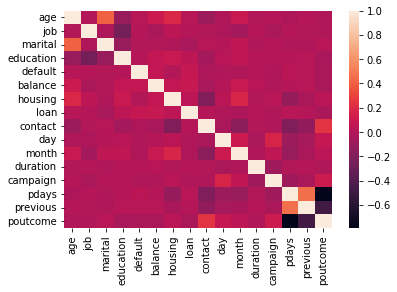

In [40]:
sns.heatmap(df_x.corr())

# Fit Model

In [41]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df_x,df_copy['y'], test_size = 0.20, random_state = 42)

**SVC with RBF Gaussian**



In [42]:
from sklearn.svm import SVC

In [47]:
rbf = svm.SVC(kernel ='rbf', random_state = 42)
rbf.fit(x_train,y_train)

SVC(random_state=42)

In [48]:
y_pred_rbf=rbf.predict(x_test)

In [49]:
from sklearn.metrics import confusion_matrix, accuracy_score
accuracy = accuracy_score(y_test,y_pred_rbf)*100
confusion_mat = confusion_matrix(y_test,y_pred_rbf)

# Print the results
print("Accuracy for SVM is: ", accuracy)
print("Confusion Matrix: \n", confusion_mat )

Accuracy for SVM is:  89.71580227800509
Confusion Matrix: 
 [[ 328  763]
 [ 167 7785]]


**SVC with Sigmoid**

In [50]:
sig = SVC(kernel ='sigmoid', random_state = 42)
sig.fit(x_train,y_train)
y_pred_sig=sig.predict(x_test)

In [51]:
accuracy = accuracy_score(y_test,y_pred_sig)*100
confusion_mat = confusion_matrix(y_test,y_pred_sig)

# Print the results
print("Accuracy for SVM is: ", accuracy)
print("Confusion Matrix: \n", confusion_mat)

Accuracy for SVM is:  84.13137233219065
Confusion Matrix: 
 [[ 358  733]
 [ 702 7250]]
